In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/online_data_final.csv",parse_dates=['order_date', 'delivery_date','open_date','birthday'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165 entries, 0 to 13164
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    13165 non-null  int64         
 1   line_item       13165 non-null  int64         
 2   order_date      13165 non-null  datetime64[ns]
 3   delivery_date   13165 non-null  datetime64[ns]
 4   customerkey     13165 non-null  int64         
 5   productkey      13165 non-null  int64         
 6   quantity        13165 non-null  int64         
 7   currency_code   13165 non-null  object        
 8   open_date       13165 non-null  datetime64[ns]
 9   gender          13165 non-null  object        
 10  first_name      13165 non-null  object        
 11  last_name       13165 non-null  object        
 12  city            13165 non-null  object        
 13  state_code      13163 non-null  object        
 14  state           13165 non-null  object        
 15  zi

In [3]:
df.isnull().sum()

,0
order_number,0
line_item,0
order_date,0
delivery_date,0
customerkey,0
productkey,0
quantity,0
currency_code,0
open_date,0
gender,0


In [4]:
df[["state","state_code"]][df["state_code"].isnull()]


,state,state_code
3521,Napoli,NaN
12925,Napoli,NaN


In [5]:
# Fill missing State_Code for Napoli with the known correct state code 'NA'
df.loc[df['state'] == 'Napoli', 'state_code'] = df.loc[df['state'] == 'Napoli', 'state_code'].fillna('NA')

# Verify that all missing values for State_Code in Napoli have been replaced
print(df[df['state'] == 'Napoli'])

       order_number  line_item order_date delivery_date  customerkey  \
3521        1611026          2 2019-05-30    2019-04-06       765589   
12925       1611026          1 2019-05-30    2019-04-06       765589   

       productkey  quantity currency_code  open_date gender  ...  \
3521         1653         2           EUR 2010-01-01   Male  ...   
12925         495         4           EUR 2010-01-01   Male  ...   

                 brand   color unit_cost_usd unit_price_usd subcategorykey  \
3521           Contoso  Silver         56.08         109.99            602   
12925  Adventure Works   Black         70.87         139.00            304   

      subcategory categorykey                       category Exchange_Rate  \
3521    Movie DVD           6  Music, Movies and Audio Books        0.8981   
12925    Monitors           3                      Computers        0.8981   

                  Generation  
3521   Early Era (1935-1950)  
12925  Early Era (1935-1950)  

[2 rows x 33 c

In [6]:
df[["state","state_code"]][df["state_code"].isnull()]

,state,state_code


In [ ]:
#Descriptive Statistics:
#Measures of Central Tendency:
import numpy as np
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Central Tendency
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

# Dispersion
std_dev_age = df['age'].std()
range_age = df['age'].max() - df['age'].min()

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")
print(f"Standard Deviation Age: {std_dev_age}, Range Age: {range_age}")


Mean Age: 55.683630839346755, Median Age: 56.0, Mode Age: 23
Standard Deviation Age: 19.525251323915633, Range Age: 67


In [ ]:
# Central Tendency
mean_value = df['quantity'].mean()
median_value = df['quantity'].median()
mode_value = df['quantity'].mode()[0]

# Dispersion
std_dev_quantity = df['quantity'].std()
range_quantity = df['quantity'].max() - df['quantity'].min()

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")
print(f"Standard Deviation: {std_dev_quantity}, Range: {range_quantity}")



Mean: 3.137941511583745, Median: 2.0, Mode: 1
Standard Deviation: 2.2509577659512665, Range: 9


In [ ]:
# Central Tendency
mean_value = df['unit_price_usd'].mean()
median_value = df['unit_price_usd'].median()
mode_value = df['unit_price_usd'].mode()[0]

# Summary of statistics
print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")



Mean: 275.4400197493353, Median: 179.99, Mode: 219.0


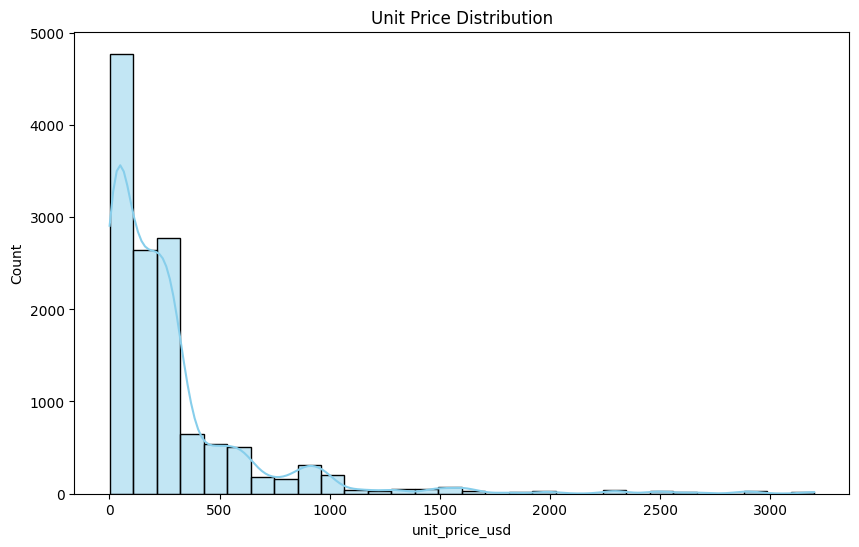

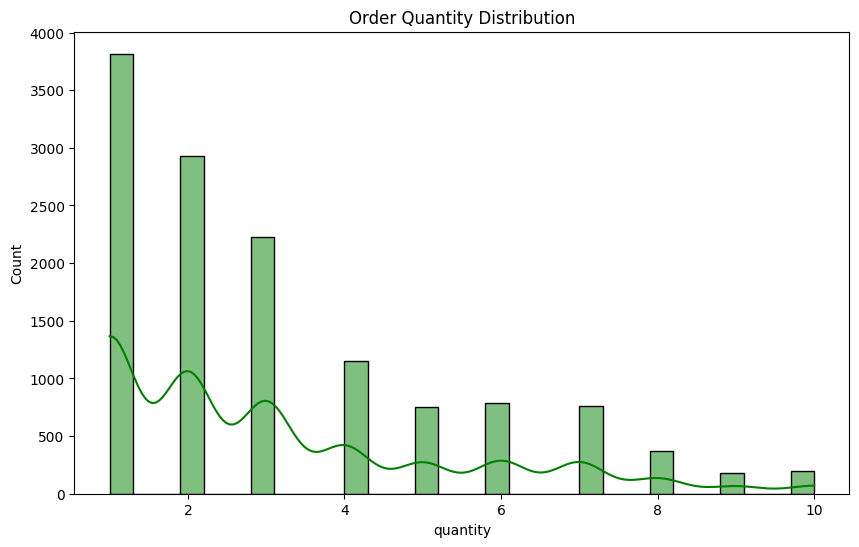

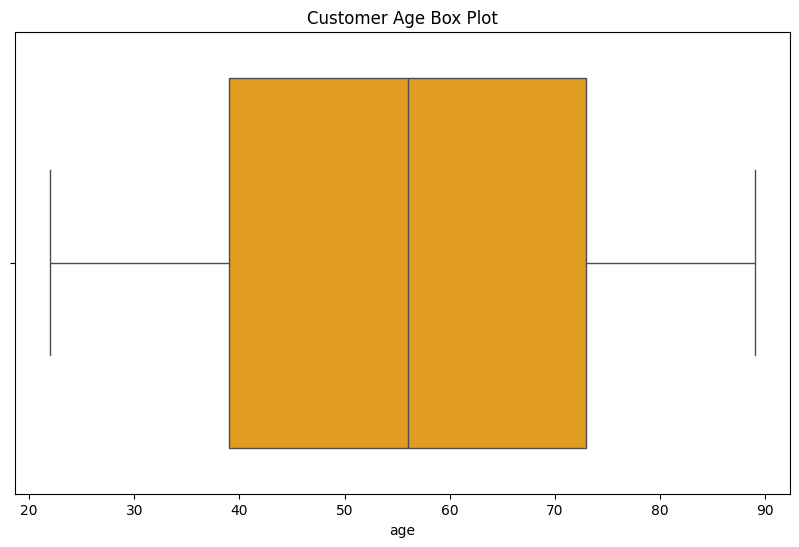

In [ ]:
# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['unit_price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Unit Price Distribution')

plt.figure(figsize=(10, 6))
sns.histplot(df['quantity'], bins=30, kde=True, color='green')
plt.title('Order Quantity Distribution')

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df, color='orange')
plt.title('Customer Age Box Plot')
plt.show()




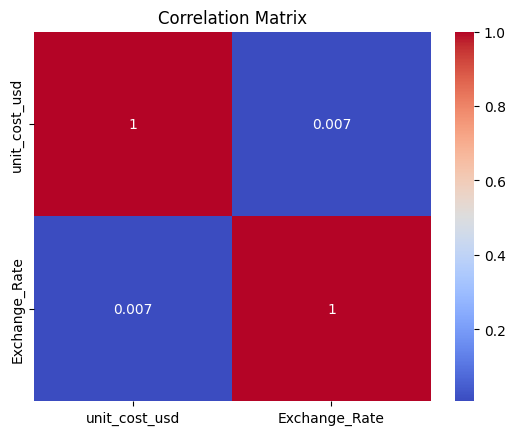

In [ ]:
#Analyze Relationships Between Variables
# Correlation matrix for numerical columns
correlation_matrix = df[['unit_cost_usd','Exchange_Rate']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame and has columns named 'unit_cost_usd' and 'Exchange_Rate'
correlation_matrix = round(stats.pearsonr(df['unit_price_usd'], df['quantity'])[0], 4)
# pearsonr returns a tuple of (correlation, p-value) so we take the first element
print(correlation_matrix)

0.0023


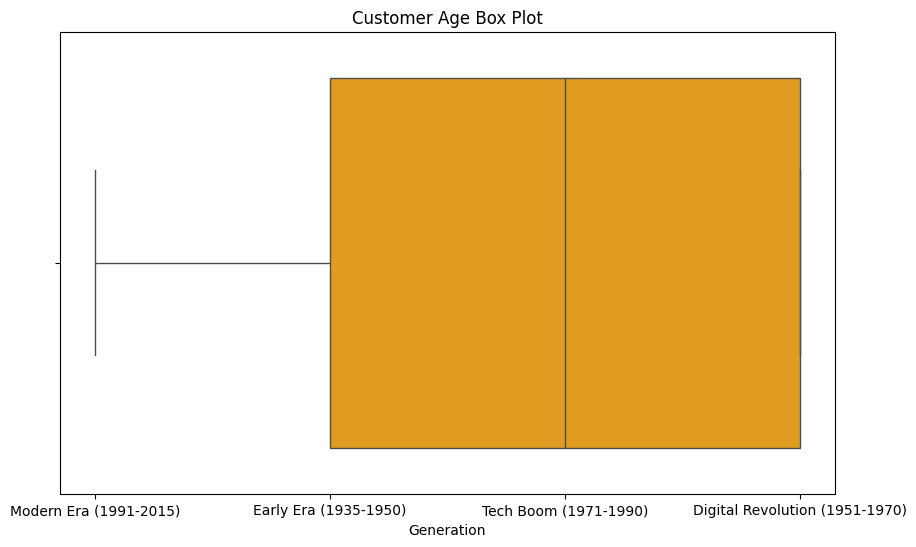

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', data=df, color='orange')
plt.title('Customer Age Box Plot')
plt.show()

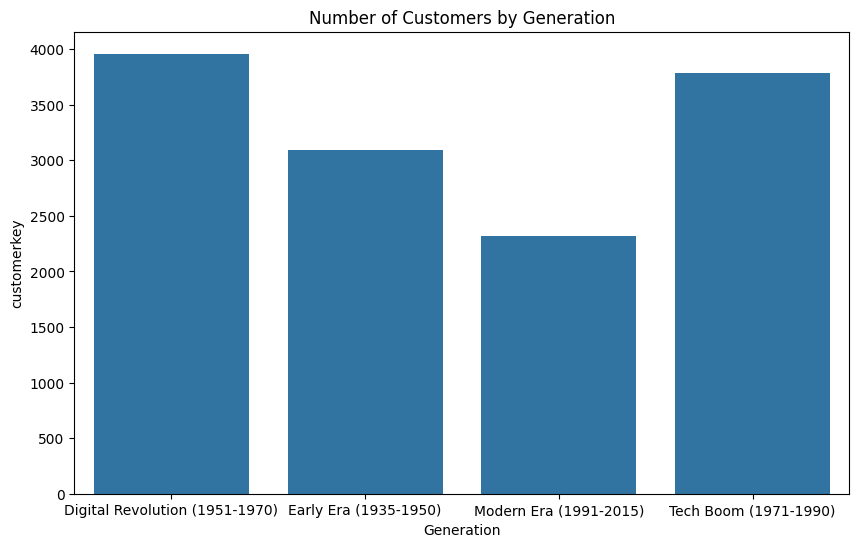

In [ ]:

import matplotlib.pyplot as plt
generation_counts = df.groupby('Generation')['customerkey'].count()

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_counts.index, y=generation_counts.values)
plt.xlabel('Generation')
plt.ylabel('customerkey')
plt.title('Number of Customers by Generation')
plt.show()


In [ ]:
generation_counts = df.groupby('Generation')['customerkey'].count()
print(generation_counts)

Generation
Digital Revolution (1951-1970)    3959
Early Era (1935-1950)             3096
Modern Era (1991-2015)            2322
Tech Boom (1971-1990)             3788
Name: customerkey, dtype: int64


<ipython-input-39-35f0f6a07b35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')


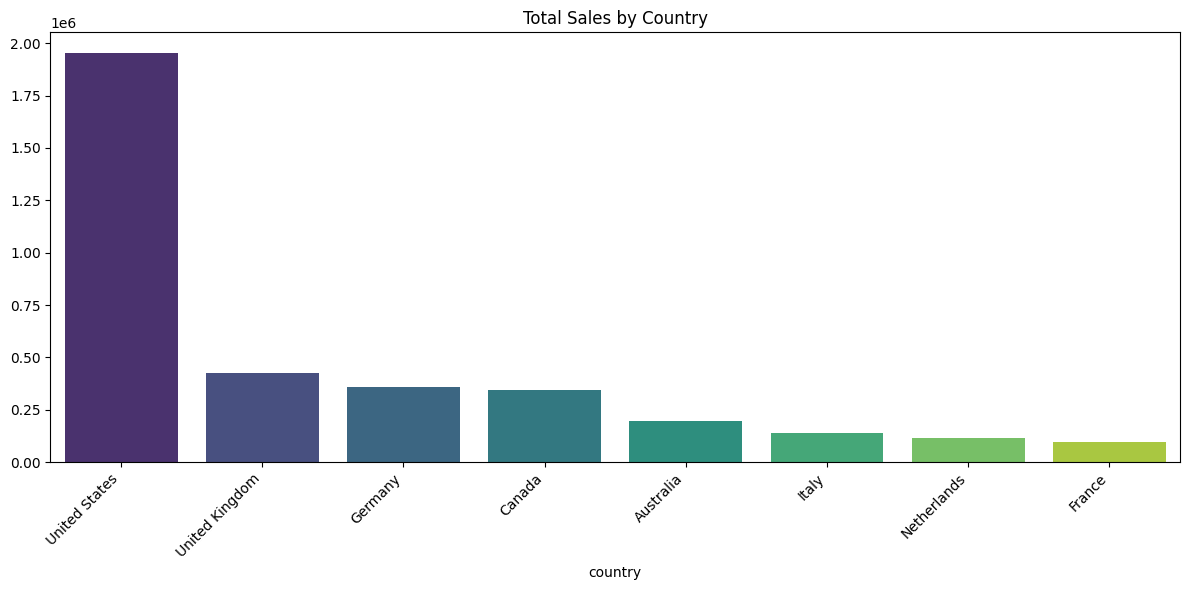

<ipython-input-39-35f0f6a07b35>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='viridis')


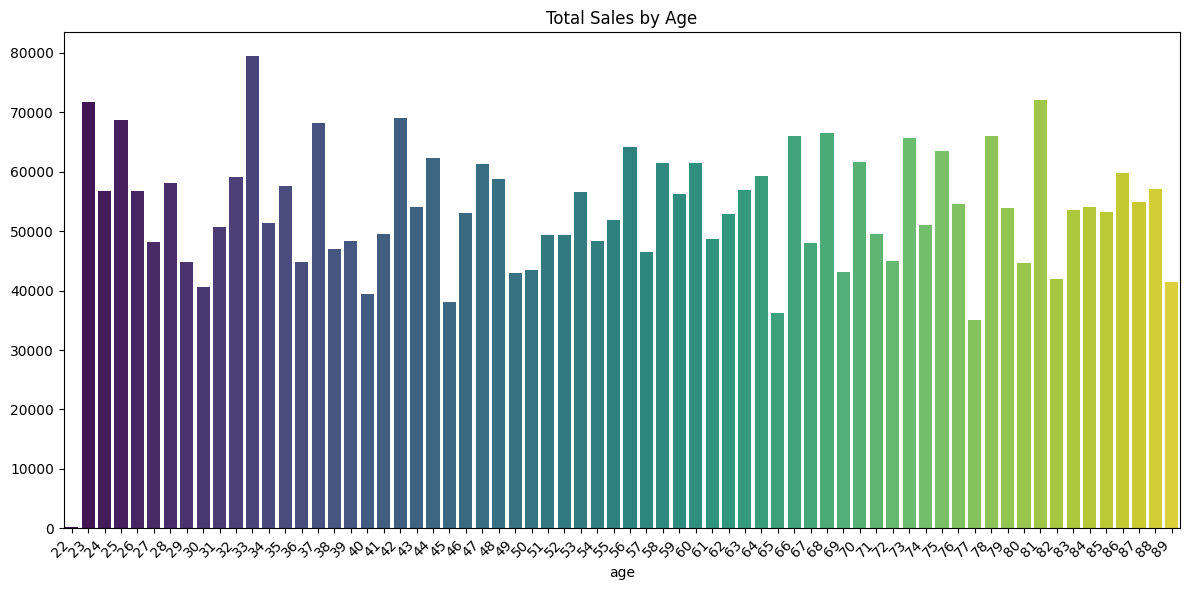

<ipython-input-39-35f0f6a07b35>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='viridis')


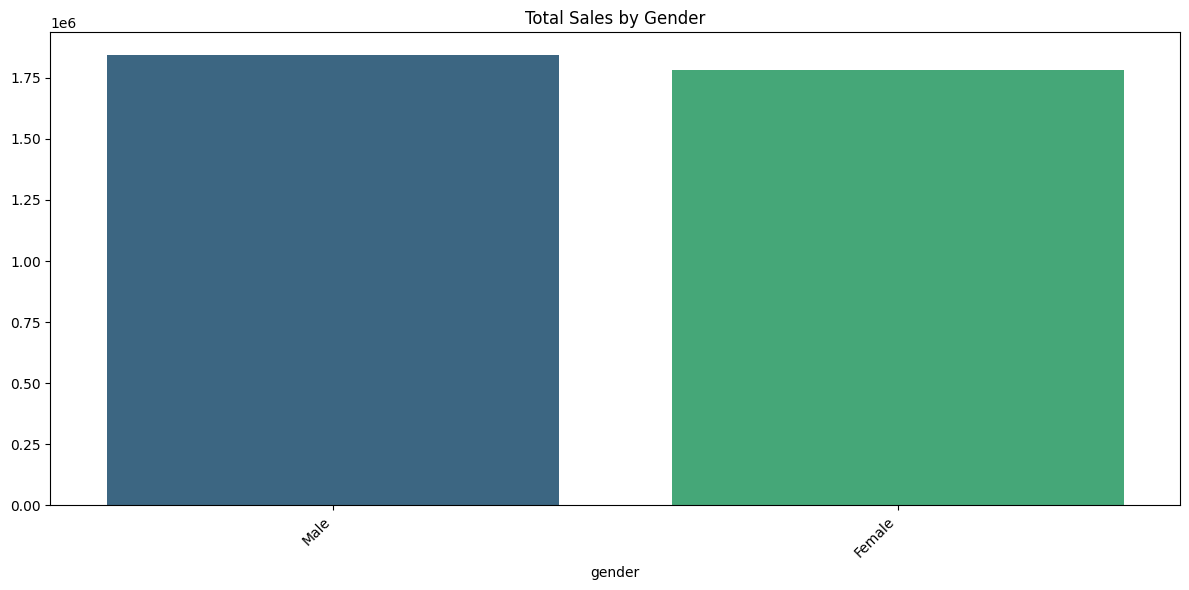

In [ ]:

# Sales by country
sales_by_country = df.groupby('country')['unit_price_usd'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')
plt.title('Total Sales by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sales by age
sales_by_age = df.groupby('age')['unit_price_usd'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='viridis')
plt.title('Total Sales by Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sales by gender
sales_by_gender = df.groupby('gender')['unit_price_usd'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='viridis')
plt.title('Total Sales by Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Hypothesis Testing
#T-Test:
from scipy import stats
# Test if there's a difference in average sales between male and female customers
male_sales = df[df['gender'] == 'Male']['quantity']
female_sales = df[df['gender'] == 'Female']['quantity']

t_stat, p_value = stats.ttest_ind(male_sales, female_sales)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
   print("Reject null hypothesis: There is a significant difference in means.")
else:
   print("Fail to reject null hypothesis: There is no significant difference in means.")

T-statistic: -0.10414146747445419, P-value: 0.9170586700881169
Fail to reject null hypothesis: There is no significant difference in means.


In [ ]:
# Perform ANOVA on sales across age groups
anova_result = stats.f_oneway(
    df[df['age'] == '20-30']['unit_price_usd'],
    df[df['age'] == '30-40']['unit_price_usd'],
    df[df['age'] == '40-50']['unit_price_usd'],
    df[df['age'] == '50-60']['unit_price_usd'],
    df[df['age'] == '60-70']['unit_price_usd']
)

# Display results
print(f"ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales across age groups.")


ANOVA F-statistic: nan, P-value: nan
Fail to reject the null hypothesis: There is no significant difference in sales across age groups.


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_number,13165.0,1473162.365059,366001.0,1217013.0,1521011.0,1809004.0,2243032.0,437728.387996
line_item,13165.0,2.149715,1.0,1.0,2.0,3.0,7.0,1.360161
order_date,13165,2019-01-13 12:07:42.681351936,2016-01-01 00:00:00,2018-03-11 00:00:00,2019-03-05 00:00:00,2019-12-14 00:00:00,2021-12-02 00:00:00,NaN
delivery_date,13165,2019-01-22 08:36:56.057729024,2016-01-02 00:00:00,2018-04-07 00:00:00,2019-03-20 00:00:00,2019-12-18 00:00:00,2021-12-02 00:00:00,NaN
customerkey,13165.0,1174501.156248,301.0,623241.0,1276598.0,1685102.0,2098404.0,597716.489654
productkey,13165.0,1124.337562,1.0,438.0,1355.0,1650.0,2517.0,707.189698
quantity,13165.0,3.137942,1.0,1.0,2.0,4.0,10.0,2.250958
open_date,13165,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,NaN
birthday,13165,1968-10-22 20:37:51.842005320,1935-01-06 00:00:00,1951-09-21 00:00:00,1968-06-09 00:00:00,1985-12-12 00:00:00,2002-03-01 00:00:00,NaN
year,13165.0,1968.316369,1935.0,1951.0,1968.0,1985.0,2002.0,19.525251


In [ ]:
df.describe(include='object')

,currency_code,gender,first_name,last_name,city,state_code,state,zip_code,country,continent,month,product_name,brand,color,subcategory,category,Generation
count,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165
unique,5,2,1744,2809,2900,351,385,3500,8,3,12,2186,11,16,32,8,4
top,USD,Male,Mary,Smith,Toronto,CA,California,90017,United States,North America,January,Adventure Works Desktop PC2.30 MD230 White,Contoso,Black,Movie DVD,Computers,Digital Revolution (1951-1970)
freq,7212,6622,157,82,156,796,793,75,7212,8421,1200,46,3382,3428,1897,2965,3959


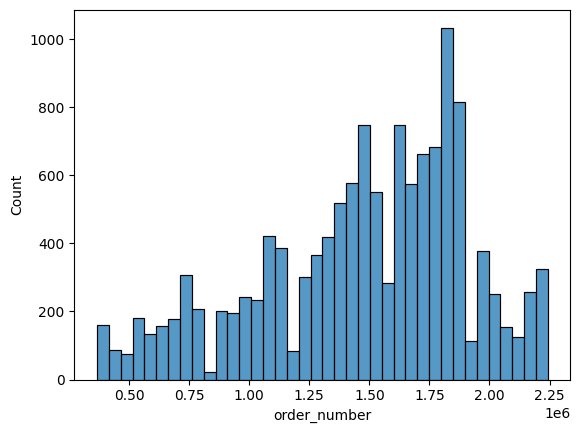

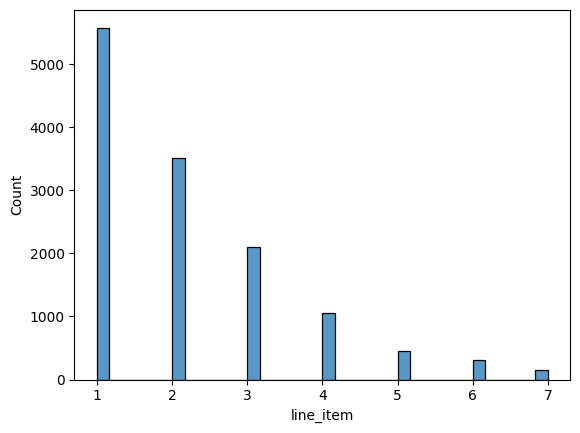

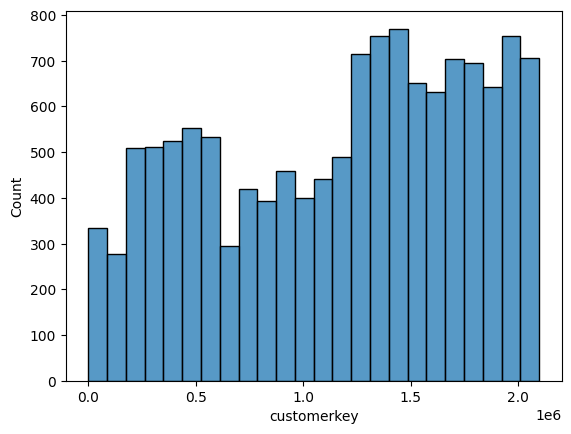

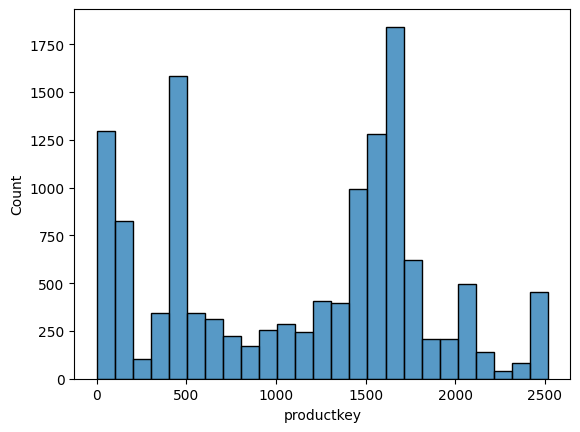

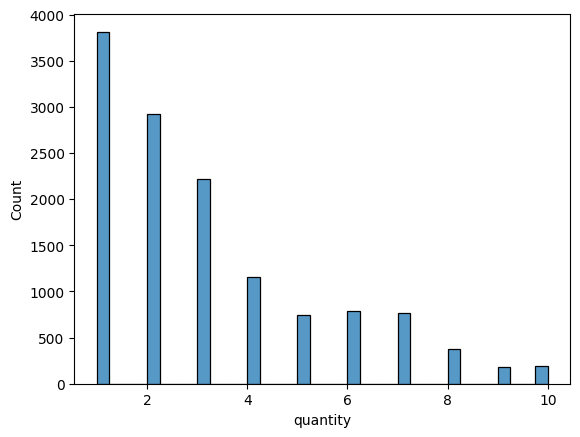

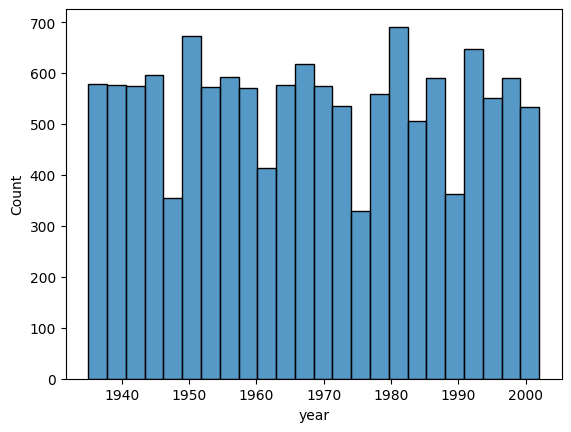

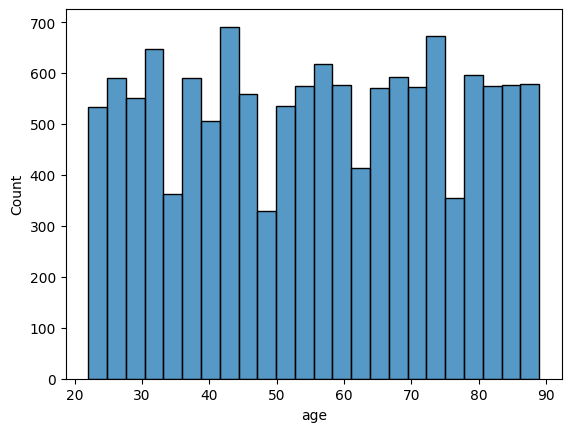

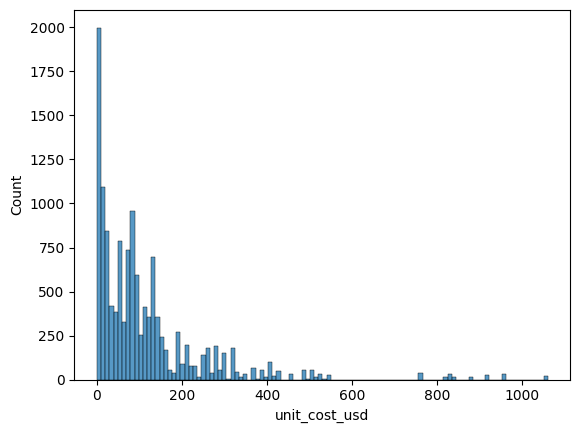

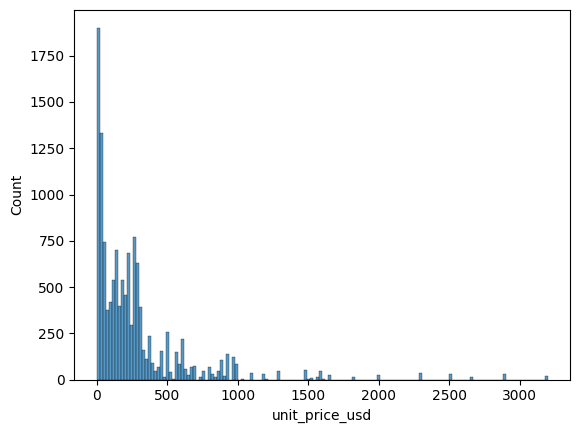

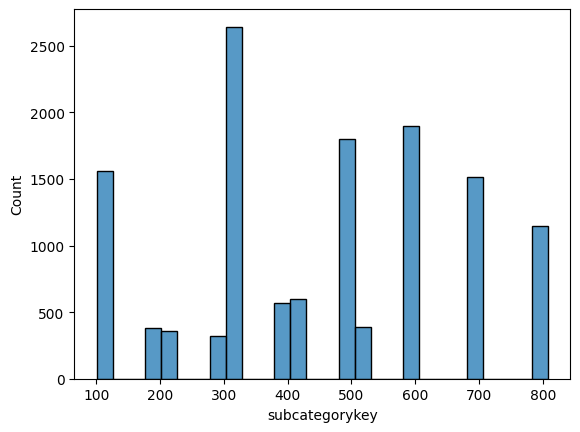

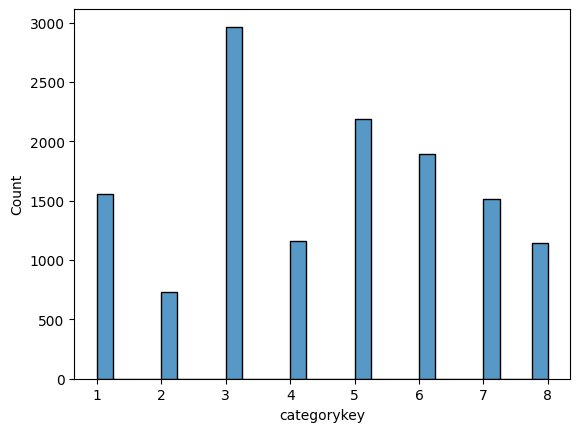

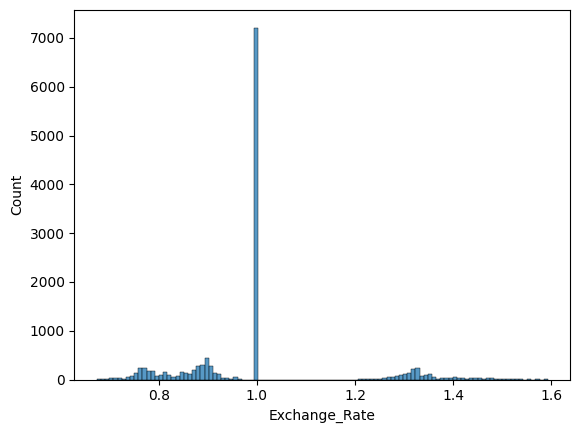

In [ ]:
#histogram to understand distibution
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

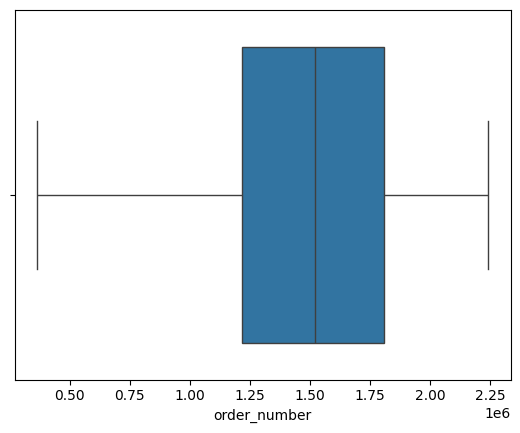

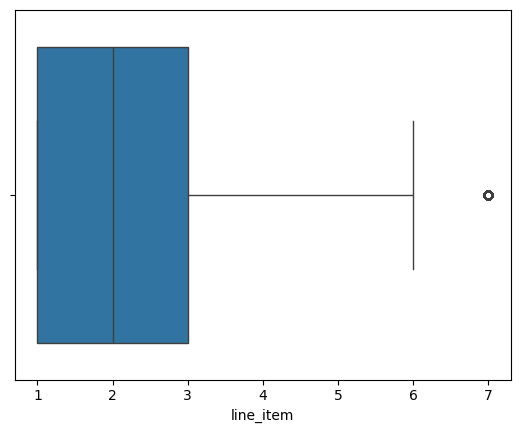

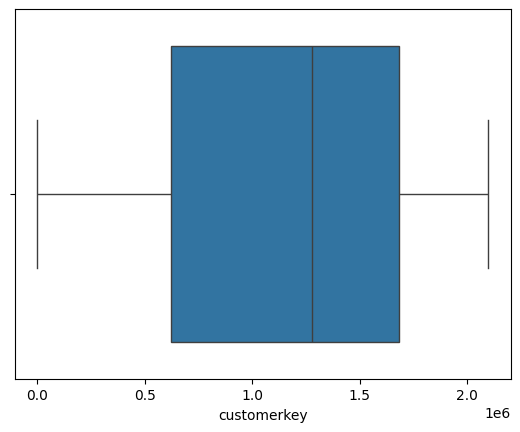

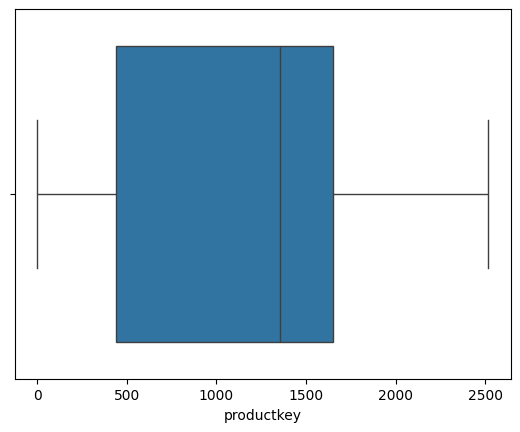

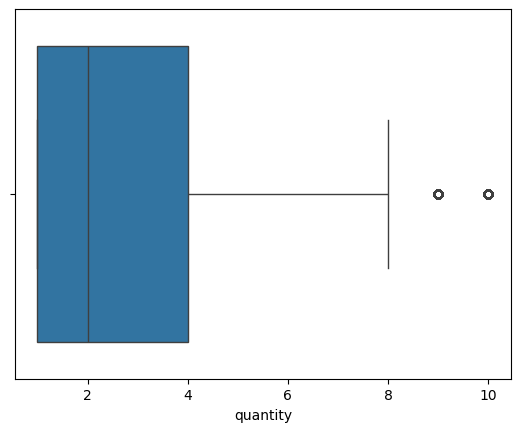

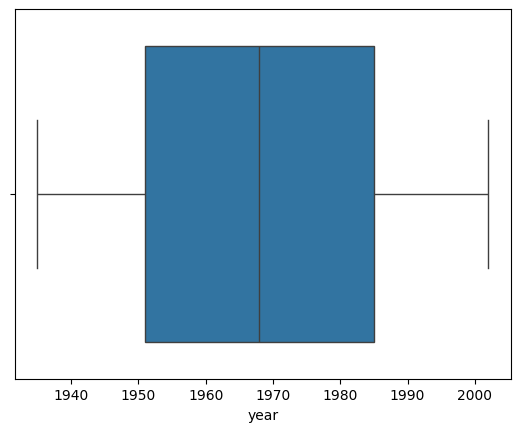

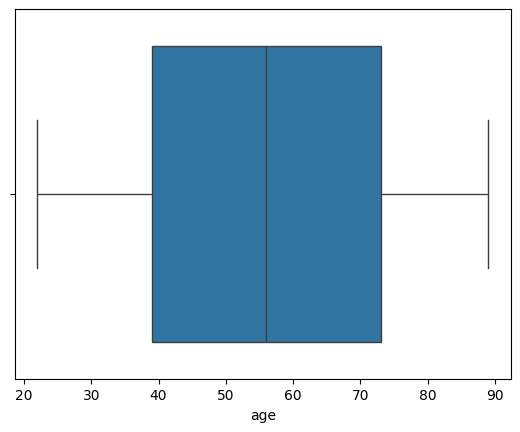

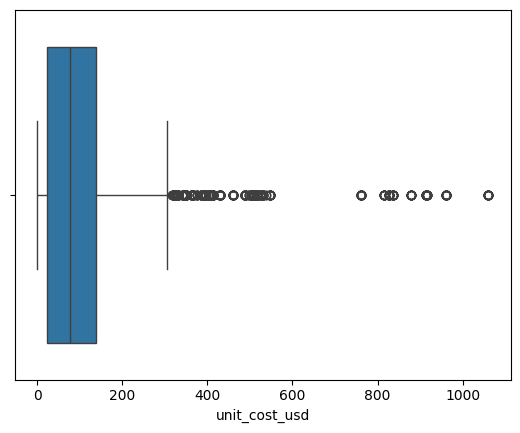

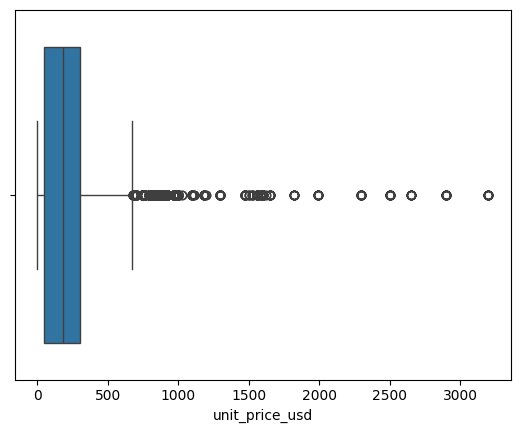

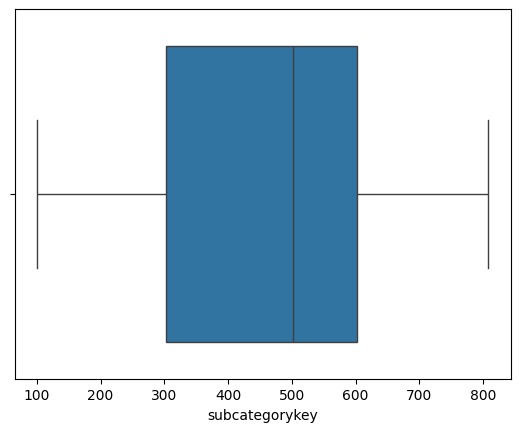

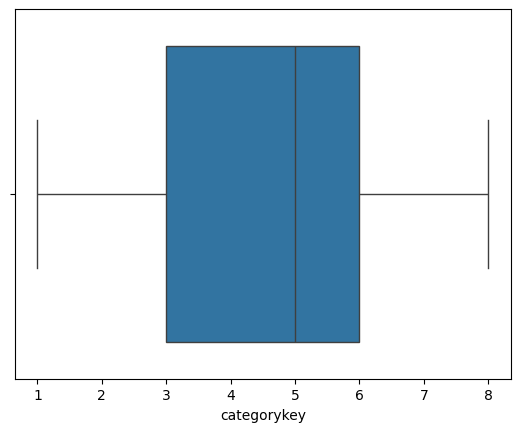

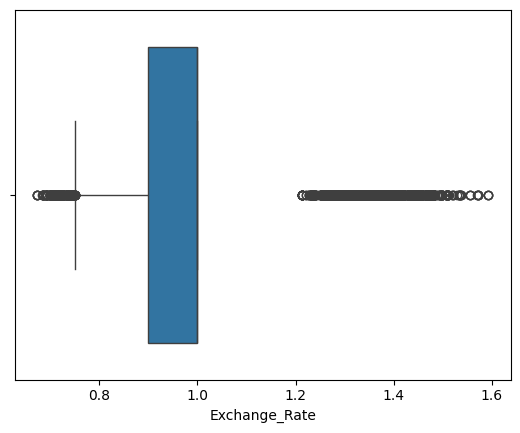

In [ ]:
#boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#scatter plot to undertand the reslationship
df.select_dtypes(include='number').columns

Index(['order_number', 'line_item', 'customerkey', 'productkey', 'quantity',
       'year', 'age', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'categorykey', 'Exchange_Rate'],
      dtype='object')

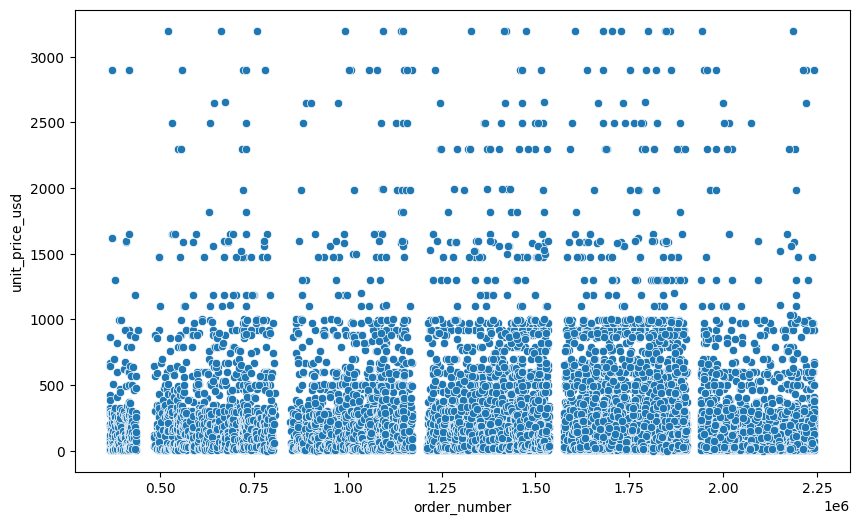

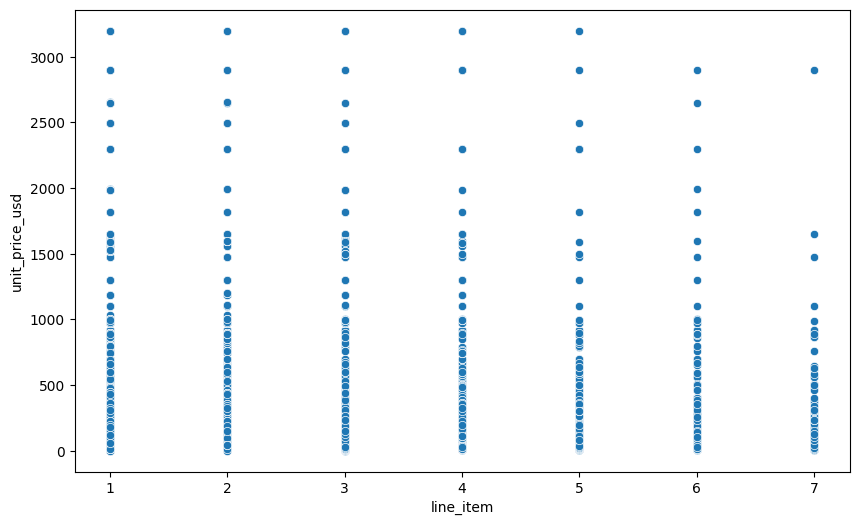

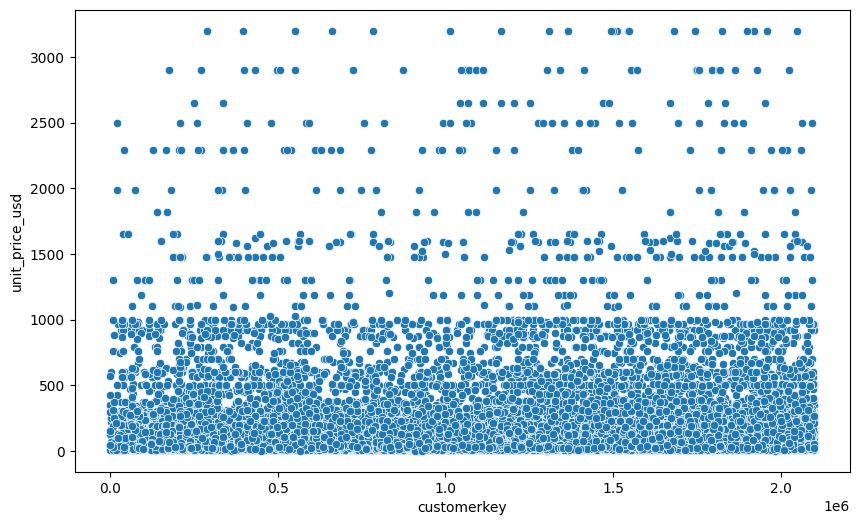

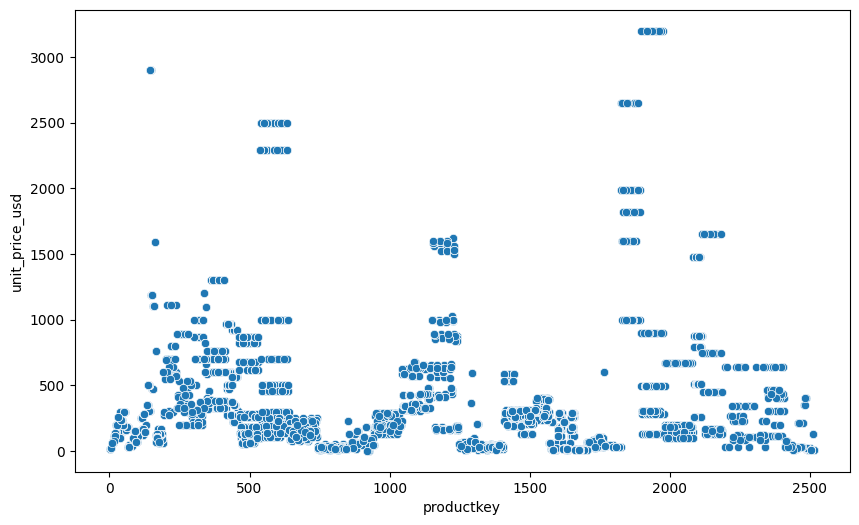

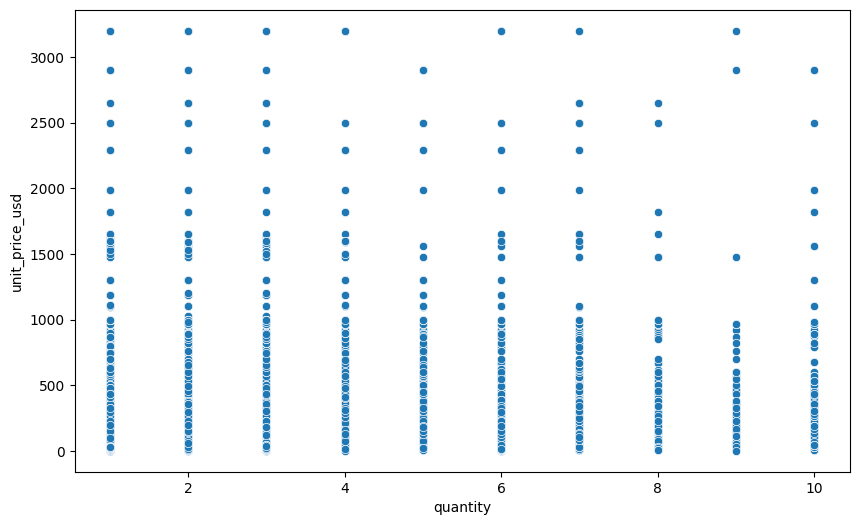

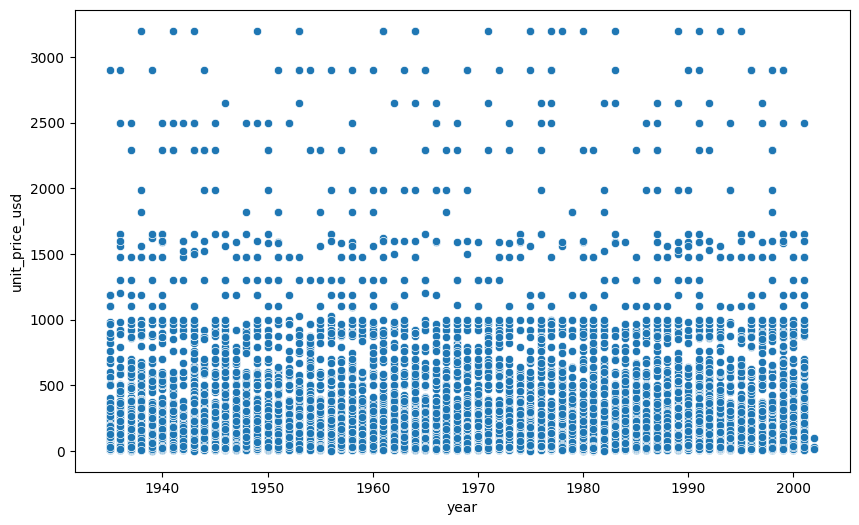

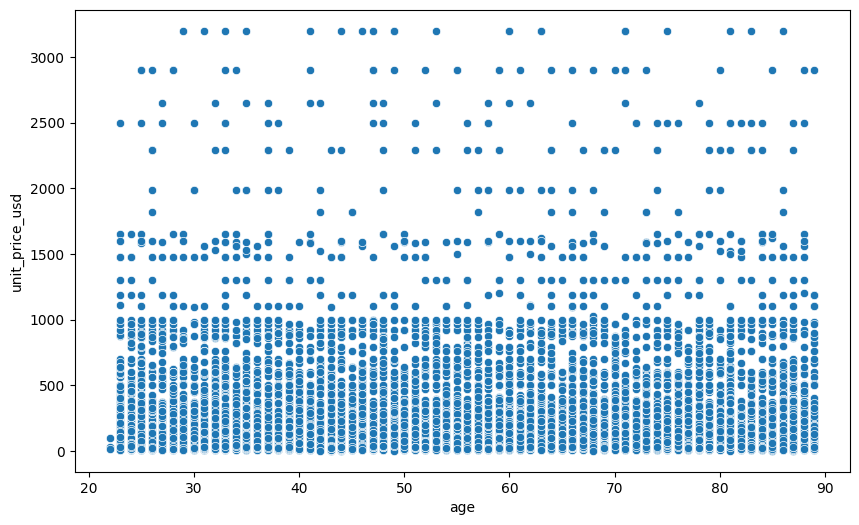

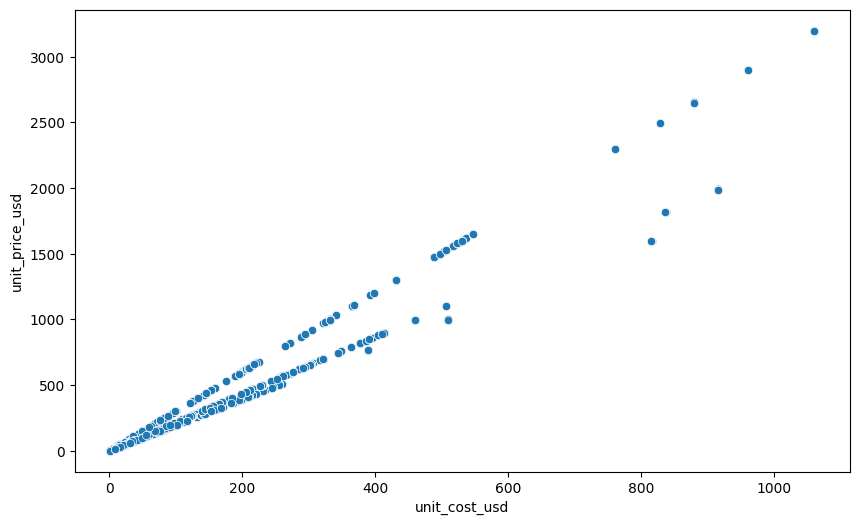

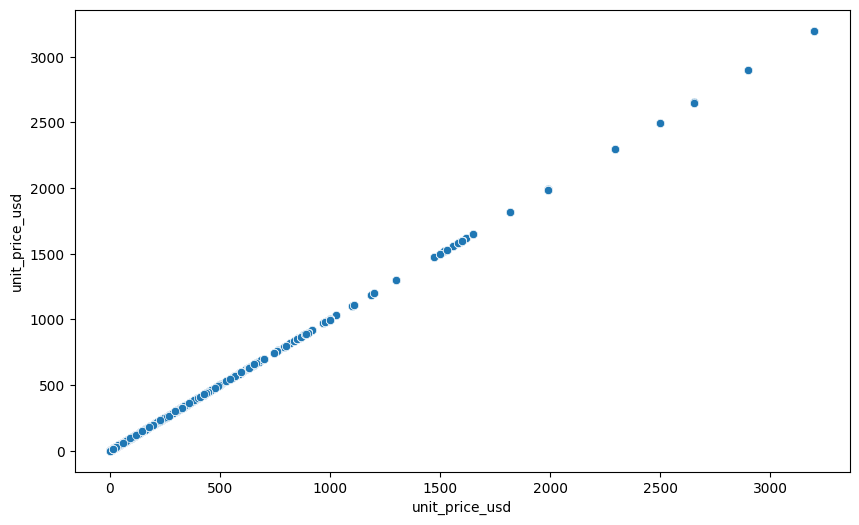

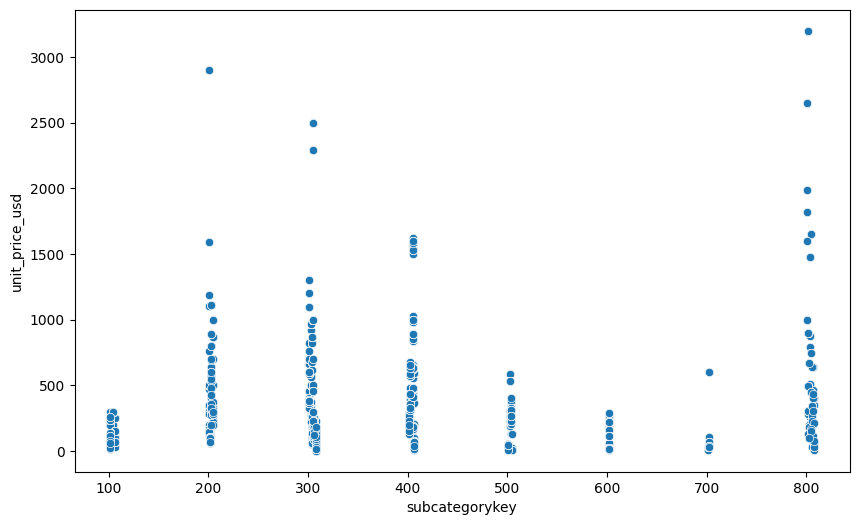

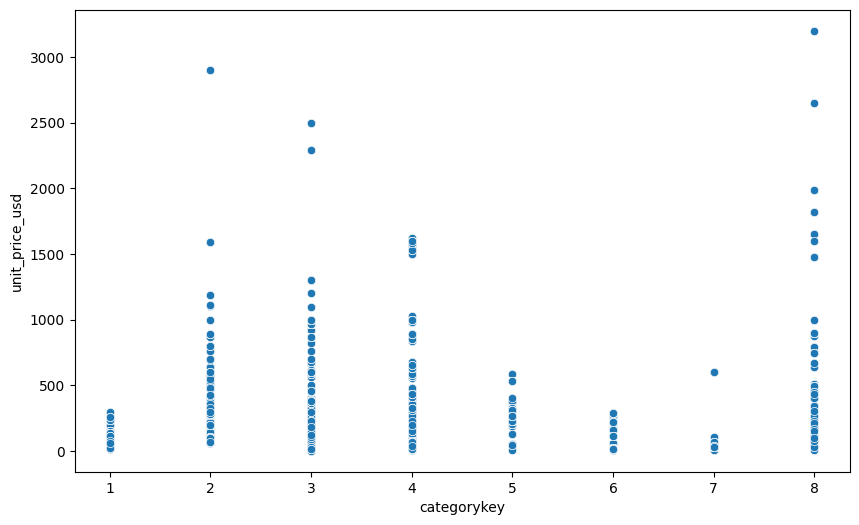

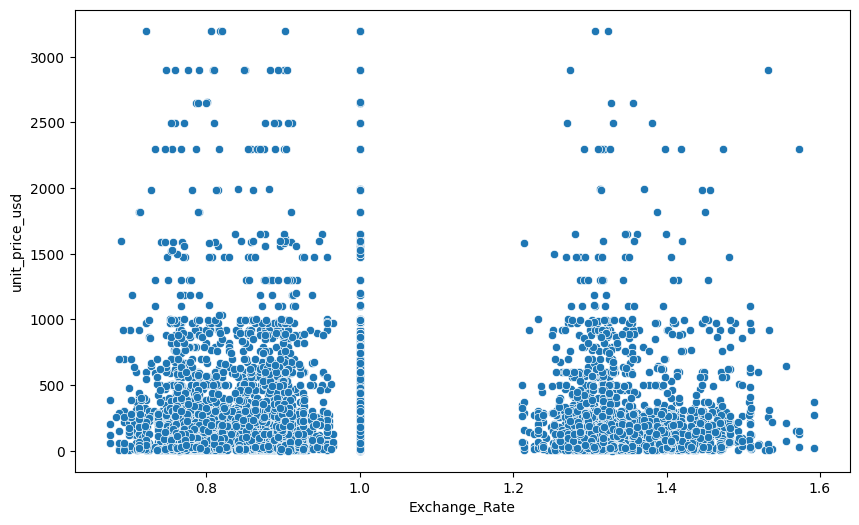

In [ ]:
for i in ['order_number', 'line_item', 'customerkey', 'productkey','quantity',
       'year', 'age', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'categorykey', 'Exchange_Rate']:
       plt.figure(figsize=(10,6))
       sns.scatterplot(data=df,x=i,y='unit_price_usd')
       plt.show()

In [ ]:
s=df.select_dtypes(include='number').corr()

<Axes: >

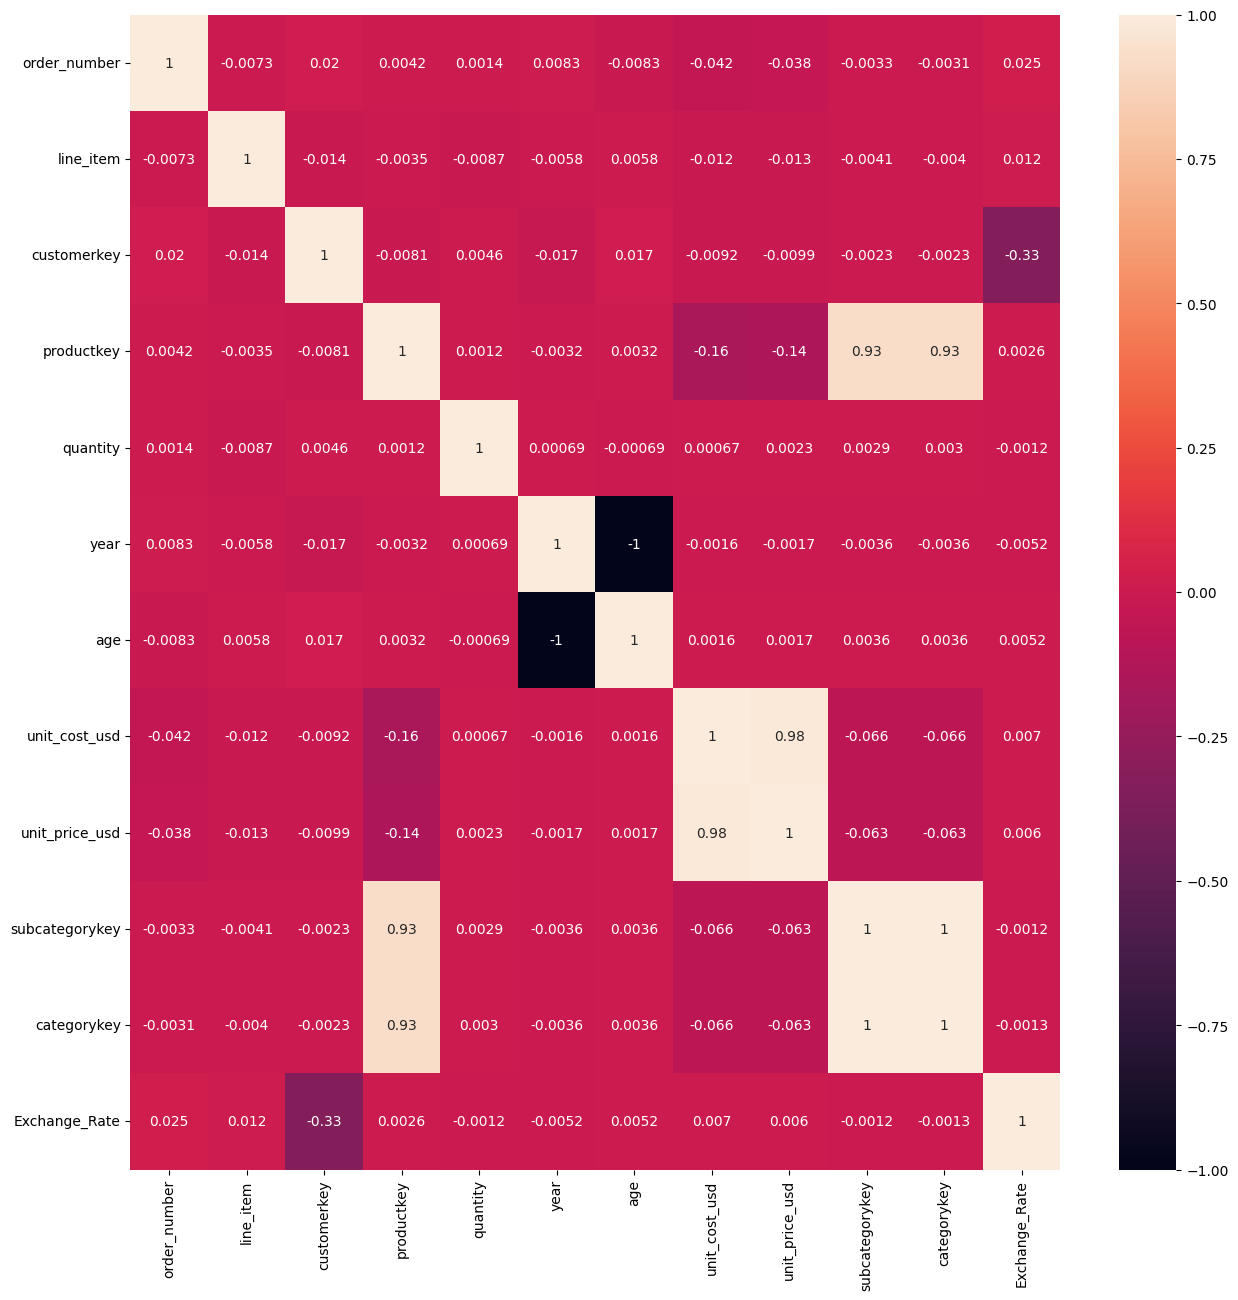

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [7]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 86.9 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62567 sha256=1012ce1af0cd0e0a6de96d256f

In [8]:
# Import necessary libraries
import pandas as pd
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

# Load the dataset
df = pd.read_csv("/content/online_data_final.csv")

# Show it using Dtale
d = dtale.show(df)
d


https://htv3bn18bb6-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1